In [43]:
import pandas as pd
import numpy as np
import sys
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))

# Load the dataset (assuming it's already loaded as a DataFrame named `data`)
df = pd.read_csv(os.path.join(os.getcwd(), "../../data/for_lstm1.csv"), index_col=0)
df


,day_starting_at_4am,open,high,low,close,volume_krw,volume_market,price_pct_change,volume__pct_change,ma_5,ma_50,mmt_120_score,rsi
0,2021-03-31 04:00:00,70913000.0,72000000.0,70838000.0,71672000.0,8.072377e+10,1128.289061,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-01 04:00:00,71619000.0,73117000.0,70670000.0,72997000.0,6.635804e+11,9202.724442,0.018487,7.220385,NaN,NaN,NaN,100.000000
2,2021-04-02 04:00:00,72997000.0,74400000.0,71841000.0,73791000.0,6.514828e+11,8859.982312,0.010877,-0.018231,NaN,NaN,NaN,100.000000
3,2021-04-03 04:00:00,73790000.0,75703000.0,73100000.0,74815000.0,5.678623e+11,7604.545110,0.013877,-0.128354,NaN,NaN,NaN,100.000000
4,2021-04-04 04:00:00,74815000.0,75100000.0,71570000.0,73090000.0,6.160404e+11,8423.984650,-0.023057,0.084841,73273000.0,NaN,NaN,64.564503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,2024-08-14 04:00:00,84725000.0,85950000.0,82483000.0,82732000.0,3.119777e+11,3703.563056,-0.024180,0.289083,84008600.0,86810520.0,-12147000.0,36.693486
1233,2024-08-15 04:00:00,82732000.0,83555000.0,81048000.0,81437000.0,2.546273e+11,3093.291193,-0.015653,-0.183829,83166000.0,86714460.0,-10389000.0,39.693413
1234,2024-08-16 04:00:00,81436000.0,83040000.0,79500000.0,82912000.0,2.868403e+11,3534.627568,0.018112,0.126510,82817000.0,86628740.0,-10240000.0,42.169944
1235,2024-08-17 04:00:00,82911000.0,83400000.0,82042000.0,82766000.0,9.552768e+10,1156.014190,-0.001761,-0.666966,82925800.0,86569660.0,-10965000.0,46.439619


In [44]:
df["next_close"] = df["close"].shift(-1)

In [45]:
df.dropna(inplace=True)
df

,day_starting_at_4am,open,high,low,close,volume_krw,volume_market,price_pct_change,volume__pct_change,ma_5,ma_50,mmt_120_score,rsi,next_close
120,2021-07-29 04:00:00,46702000.0,47000000.0,45529000.0,45659000.0,2.755713e+11,5968.227347,-0.022898,-0.528166,44476800.0,40433100.0,-26013000.0,71.138005,45347000.0
121,2021-07-30 04:00:00,45659000.0,46400000.0,44450000.0,45347000.0,3.240167e+11,7147.581502,-0.006833,0.175800,45533000.0,40483800.0,-27650000.0,69.394327,47972000.0
122,2021-07-31 04:00:00,45346000.0,48768000.0,45341000.0,47972000.0,3.590562e+11,7502.734972,0.057887,0.108141,45921400.0,40579020.0,-25819000.0,74.205368,47688000.0
123,2021-08-01 04:00:00,47972000.0,49471000.0,47400000.0,47688000.0,2.642493e+11,5471.325642,-0.005920,-0.264045,46679000.0,40697980.0,-27127000.0,73.368655,45951000.0
124,2021-08-02 04:00:00,47744000.0,48157000.0,45438000.0,45951000.0,3.776274e+11,8167.253926,-0.036424,0.429057,46523400.0,40748000.0,-27139000.0,70.284574,44858000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,2024-08-13 04:00:00,82223000.0,85770000.0,82050000.0,84782000.0,2.420152e+11,2898.635085,0.031135,-0.484749,84440000.0,86909300.0,-11224000.0,40.053662,82732000.0
1232,2024-08-14 04:00:00,84725000.0,85950000.0,82483000.0,82732000.0,3.119777e+11,3703.563056,-0.024180,0.289083,84008600.0,86810520.0,-12147000.0,36.693486,81437000.0
1233,2024-08-15 04:00:00,82732000.0,83555000.0,81048000.0,81437000.0,2.546273e+11,3093.291193,-0.015653,-0.183829,83166000.0,86714460.0,-10389000.0,39.693413,82912000.0
1234,2024-08-16 04:00:00,81436000.0,83040000.0,79500000.0,82912000.0,2.868403e+11,3534.627568,0.018112,0.126510,82817000.0,86628740.0,-10240000.0,42.169944,82766000.0


In [46]:
df.dtypes

day_starting_at_4am     object
open                   float64
high                   float64
low                    float64
close                  float64
volume_krw             float64
volume_market          float64
price_pct_change       float64
volume__pct_change     float64
ma_5                   float64
ma_50                  float64
mmt_120_score          float64
rsi                    float64
next_close             float64
dtype: object

In [47]:
df.drop(columns="day_starting_at_4am", inplace=True)
df

,open,high,low,close,volume_krw,volume_market,price_pct_change,volume__pct_change,ma_5,ma_50,mmt_120_score,rsi,next_close
120,46702000.0,47000000.0,45529000.0,45659000.0,2.755713e+11,5968.227347,-0.022898,-0.528166,44476800.0,40433100.0,-26013000.0,71.138005,45347000.0
121,45659000.0,46400000.0,44450000.0,45347000.0,3.240167e+11,7147.581502,-0.006833,0.175800,45533000.0,40483800.0,-27650000.0,69.394327,47972000.0
122,45346000.0,48768000.0,45341000.0,47972000.0,3.590562e+11,7502.734972,0.057887,0.108141,45921400.0,40579020.0,-25819000.0,74.205368,47688000.0
123,47972000.0,49471000.0,47400000.0,47688000.0,2.642493e+11,5471.325642,-0.005920,-0.264045,46679000.0,40697980.0,-27127000.0,73.368655,45951000.0
124,47744000.0,48157000.0,45438000.0,45951000.0,3.776274e+11,8167.253926,-0.036424,0.429057,46523400.0,40748000.0,-27139000.0,70.284574,44858000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,82223000.0,85770000.0,82050000.0,84782000.0,2.420152e+11,2898.635085,0.031135,-0.484749,84440000.0,86909300.0,-11224000.0,40.053662,82732000.0
1232,84725000.0,85950000.0,82483000.0,82732000.0,3.119777e+11,3703.563056,-0.024180,0.289083,84008600.0,86810520.0,-12147000.0,36.693486,81437000.0
1233,82732000.0,83555000.0,81048000.0,81437000.0,2.546273e+11,3093.291193,-0.015653,-0.183829,83166000.0,86714460.0,-10389000.0,39.693413,82912000.0
1234,81436000.0,83040000.0,79500000.0,82912000.0,2.868403e+11,3534.627568,0.018112,0.126510,82817000.0,86628740.0,-10240000.0,42.169944,82766000.0


In [48]:
def get_result_basicCV(df):
    y = df['next_close']
    x = df.drop(columns='next_close')
    x_dummies = pd.get_dummies(x, drop_first=True)
#     x_dummies = pd.get_dummies(x)
    feature_names = x_dummies.columns  # Store feature names for later use
    # print(feature_names)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(x_dummies)
    
    model = LinearRegression()
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv)
    
    rmse_scores = []
    adjusted_r2_scores = []
    all_coeffs = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = metrics.mean_squared_error(y_test, y_pred)
        rmse_scores.append(np.sqrt(mse))
        
        r2 = metrics.r2_score(y_test, y_pred)
        n = len(y_test)
        p = X_test.shape[1]
        adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
        adjusted_r2_scores.append(adjusted_r2)
        
        all_coeffs.append(np.abs(model.coef_))  # Store absolute coefficients for each fold
        
    mean_rmse = np.mean(rmse_scores)
    mean_r2 = np.mean(scores_r2)
    mean_adjusted_r2 = np.mean(adjusted_r2_scores)

    print(f"Mean RMSE: {mean_rmse}")
    print(f"Mean R^2: {mean_r2}")
    print(f"Mean Adjusted R^2: {mean_adjusted_r2}")

    # Calculate the mean of the absolute coefficients across folds
    mean_abs_coeffs = np.mean(all_coeffs, axis=0)
    
    # Aggregate coefficients for original categorical features using the mean
    aggregated_coeffs = {}
    counts = {}  # To track the number of dummy variables for each original feature
    for i, name in enumerate(feature_names):
        original_name = name
        if original_name in aggregated_coeffs:
            aggregated_coeffs[original_name] += mean_abs_coeffs[i]
            counts[original_name] += 1
        else:
            aggregated_coeffs[original_name] = mean_abs_coeffs[i]
            counts[original_name] = 1
    
    # Calculate the mean of aggregated coefficients
    for feature in aggregated_coeffs:
        aggregated_coeffs[feature] /= counts[feature]
    
    # Sort the aggregated coefficients in descending order
    sorted_aggregated_coeffs = sorted(aggregated_coeffs.items(), key=lambda x: x[1], reverse=True)
    sorted_feature_names, sorted_mean_aggregated_coeffs = zip(*sorted_aggregated_coeffs)  # Unzip the list of tuples

    # Plotting the sorted aggregated mean absolute feature coefficients
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(sorted_feature_names)), sorted_mean_aggregated_coeffs)
    plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
    plt.xlabel('Aggregated Average Absolute Coefficient Value')
    plt.ylabel('Feature')
    plt.title('Aggregated Average Absolute Feature Coefficients from Linear Regression across CV Folds')
    plt.gca().invert_yaxis()
    plt.show()

Mean RMSE: 1330739.769585184
Mean R^2: 0.9963546827153511
Mean Adjusted R^2: 0.9961465609704419


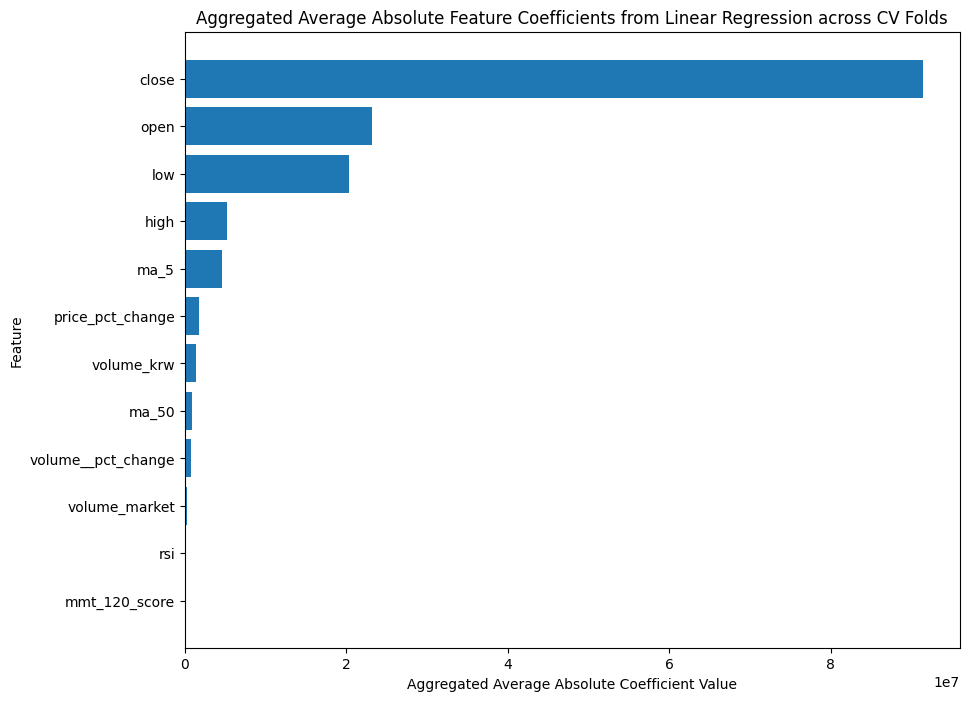

In [49]:
get_result_basicCV(df=df)

In [50]:
# y = df["next_close"]
# x = df.drop(columns="next_close")
# x_dummies = pd.get_dummies(x, drop_first=True)
# #     x_dummies = pd.get_dummies(x)
# feature_names = x_dummies.columns  # Store feature names for later use
# scaler = MinMaxScaler()
# X = scaler.fit_transform(x_dummies)

# model = LinearRegression()
# cv = KFold(n_splits=5, random_state=42, shuffle=True)
# scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv)

Mean RMSE: 1330739.769585184
Mean R^2: 0.9963546827153511
Mean Adjusted R^2: 0.9961465609704419


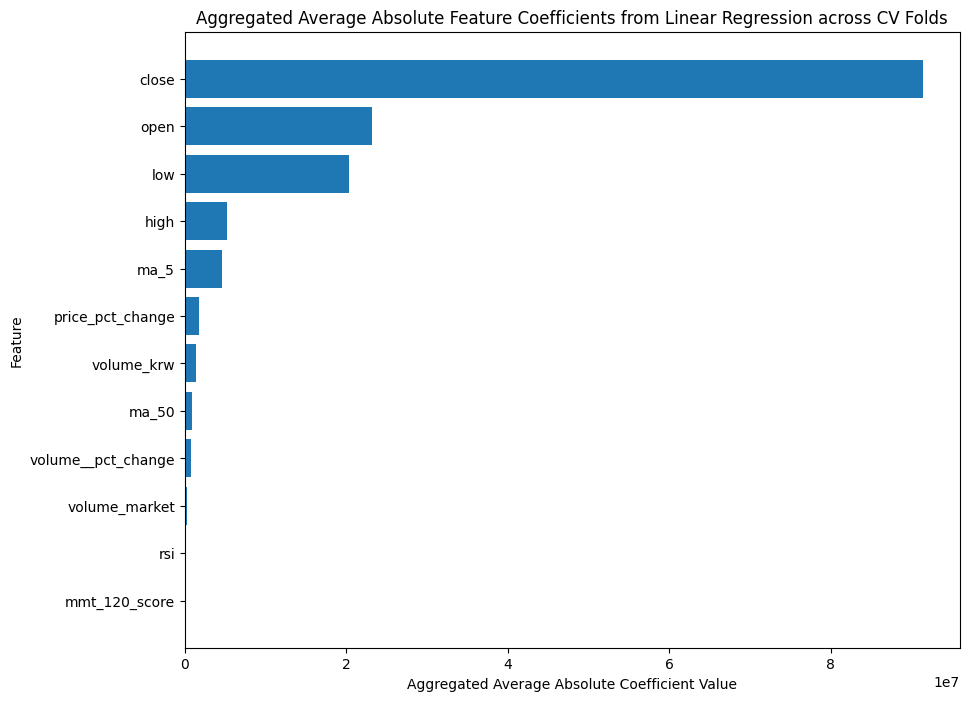

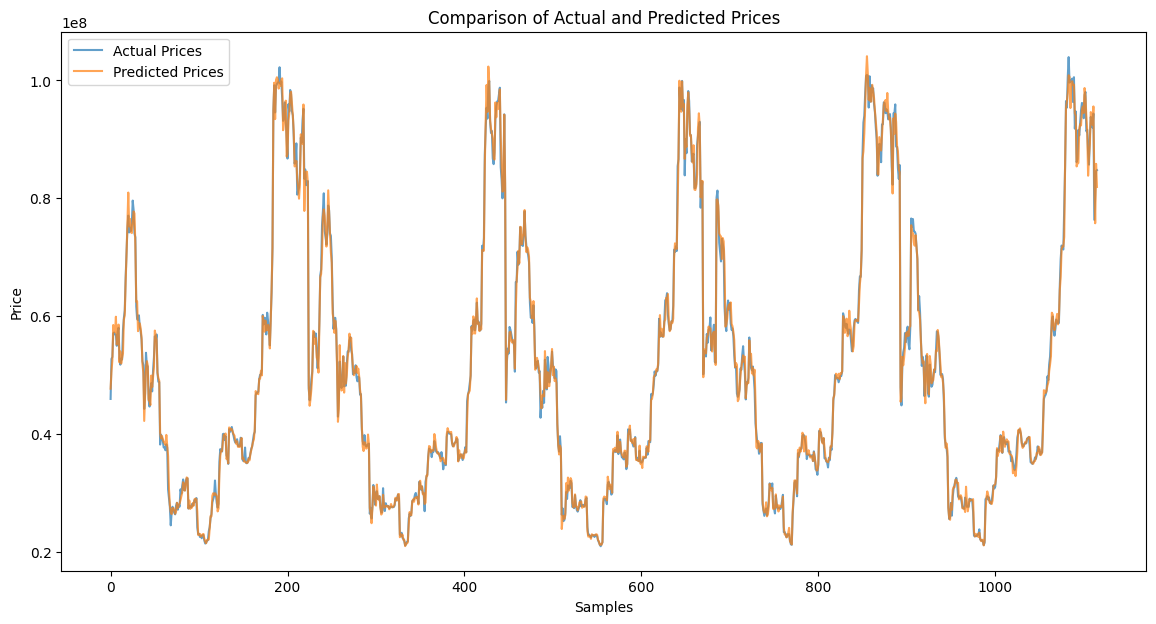

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt

def get_result_basicCV(df):
    y = df['next_close']
    x = df.drop(columns='next_close')
    x_dummies = pd.get_dummies(x, drop_first=True)
    feature_names = x_dummies.columns  # Store feature names for later use
    
    scaler = MinMaxScaler()
    X = scaler.fit_transform(x_dummies)
    
    model = LinearRegression()
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv)
    
    rmse_scores = []
    adjusted_r2_scores = []
    all_coeffs = []
    
    all_actuals = []
    all_predictions = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = metrics.mean_squared_error(y_test, y_pred)
        rmse_scores.append(np.sqrt(mse))
        
        r2 = metrics.r2_score(y_test, y_pred)
        n = len(y_test)
        p = X_test.shape[1]
        adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
        adjusted_r2_scores.append(adjusted_r2)
        
        all_coeffs.append(np.abs(model.coef_))  # Store absolute coefficients for each fold

        # Store the actual and predicted values
        all_actuals.extend(y_test)
        all_predictions.extend(y_pred)
        
    mean_rmse = np.mean(rmse_scores)
    mean_r2 = np.mean(scores_r2)
    mean_adjusted_r2 = np.mean(adjusted_r2_scores)

    print(f"Mean RMSE: {mean_rmse}")
    print(f"Mean R^2: {mean_r2}")
    print(f"Mean Adjusted R^2: {mean_adjusted_r2}")

    # Calculate the mean of the absolute coefficients across folds
    mean_abs_coeffs = np.mean(all_coeffs, axis=0)
    
    # Aggregate coefficients for original categorical features using the mean
    aggregated_coeffs = {}
    counts = {}  # To track the number of dummy variables for each original feature
    for i, name in enumerate(feature_names):
        original_name = name
        if original_name in aggregated_coeffs:
            aggregated_coeffs[original_name] += mean_abs_coeffs[i]
            counts[original_name] += 1
        else:
            aggregated_coeffs[original_name] = mean_abs_coeffs[i]
            counts[original_name] = 1
    
    # Calculate the mean of aggregated coefficients
    for feature in aggregated_coeffs:
        aggregated_coeffs[feature] /= counts[feature]
    
    # Sort the aggregated coefficients in descending order
    sorted_aggregated_coeffs = sorted(aggregated_coeffs.items(), key=lambda x: x[1], reverse=True)
    sorted_feature_names, sorted_mean_aggregated_coeffs = zip(*sorted_aggregated_coeffs)  # Unzip the list of tuples

    # Plotting the sorted aggregated mean absolute feature coefficients
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(sorted_feature_names)), sorted_mean_aggregated_coeffs)
    plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
    plt.xlabel('Aggregated Average Absolute Coefficient Value')
    plt.ylabel('Feature')
    plt.title('Aggregated Average Absolute Feature Coefficients from Linear Regression across CV Folds')
    plt.gca().invert_yaxis()
    plt.show()

    # Plotting the comparison graph of actual vs predicted prices
    plt.figure(figsize=(14, 7))
    plt.plot(all_actuals, label="Actual Prices", alpha=0.7)
    plt.plot(all_predictions, label="Predicted Prices", alpha=0.7)
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.title('Comparison of Actual and Predicted Prices')
    plt.legend()
    plt.show()

# Example usage:
# df = pd.read_csv('your_data.csv')
get_result_basicCV(df)


RMSE: 1938092.865936474
R^2: 0.979298925295743
Adjusted R^2: 0.9781216129902877


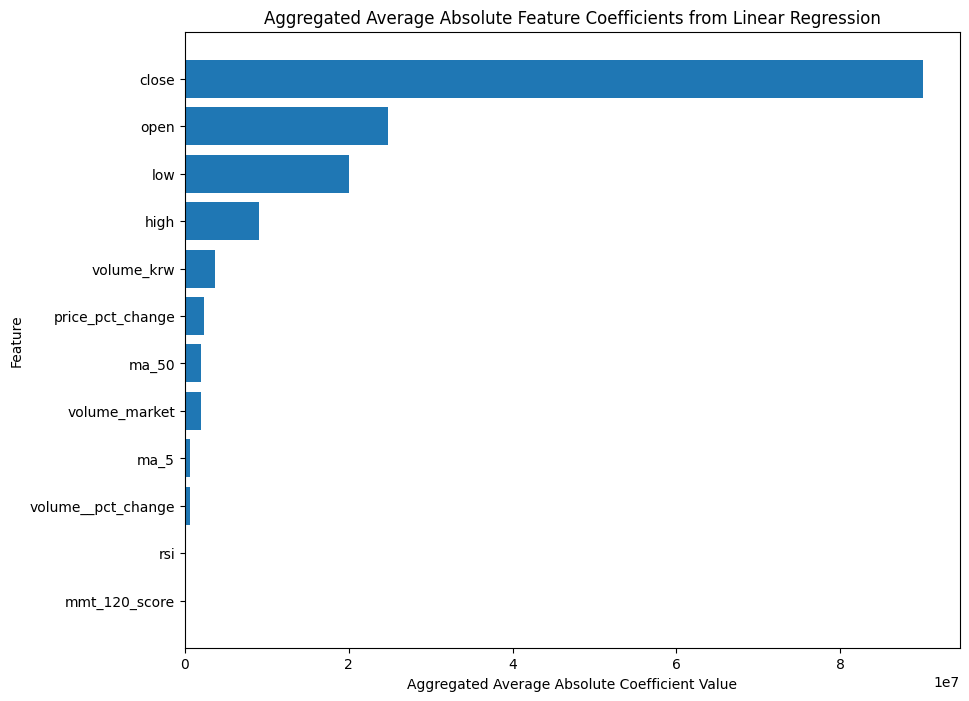

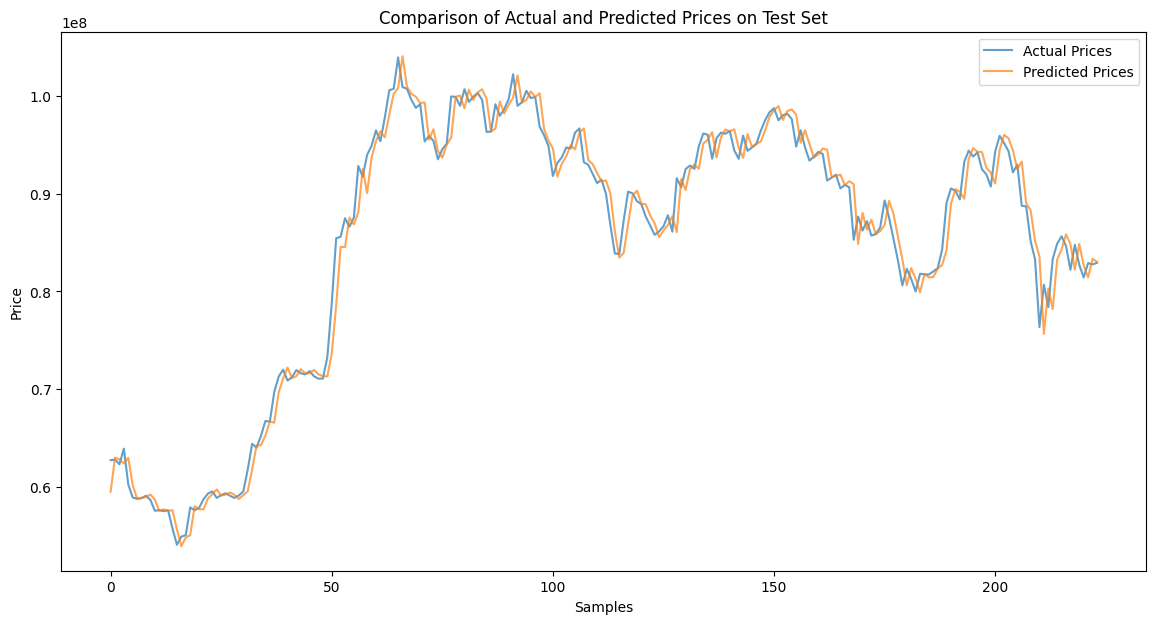

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt

def get_result_basicCV(df):
    y = df['next_close']
    x = df.drop(columns='next_close')
    x_dummies = pd.get_dummies(x, drop_first=True)
    feature_names = x_dummies.columns  # Store feature names for later use
    
    scaler = MinMaxScaler()
    X = scaler.fit_transform(x_dummies)
    
    # Split the data into 80% train and 20% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
    
    # Train the model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print(f"Adjusted R^2: {adjusted_r2}")

    # Calculate absolute coefficients
    abs_coeffs = np.abs(model.coef_)
    
    # Aggregate coefficients for original categorical features using the mean
    aggregated_coeffs = {}
    counts = {}  # To track the number of dummy variables for each original feature
    for i, name in enumerate(feature_names):
        original_name = name
        if original_name in aggregated_coeffs:
            aggregated_coeffs[original_name] += abs_coeffs[i]
            counts[original_name] += 1
        else:
            aggregated_coeffs[original_name] = abs_coeffs[i]
            counts[original_name] = 1
    
    # Calculate the mean of aggregated coefficients
    for feature in aggregated_coeffs:
        aggregated_coeffs[feature] /= counts[feature]
    
    # Sort the aggregated coefficients in descending order
    sorted_aggregated_coeffs = sorted(aggregated_coeffs.items(), key=lambda x: x[1], reverse=True)
    sorted_feature_names, sorted_mean_aggregated_coeffs = zip(*sorted_aggregated_coeffs)  # Unzip the list of tuples

    # Plotting the sorted aggregated mean absolute feature coefficients
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(sorted_feature_names)), sorted_mean_aggregated_coeffs)
    plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
    plt.xlabel('Aggregated Average Absolute Coefficient Value')
    plt.ylabel('Feature')
    plt.title('Aggregated Average Absolute Feature Coefficients from Linear Regression')
    plt.gca().invert_yaxis()
    plt.show()

    # Plotting the comparison graph of actual vs predicted prices on the test set
    plt.figure(figsize=(14, 7))
    plt.plot(y_test.values, label="Actual Prices", alpha=0.7)
    plt.plot(y_pred, label="Predicted Prices", alpha=0.7)
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.title('Comparison of Actual and Predicted Prices on Test Set')
    plt.legend()
    plt.show()

# Example usage:
# df = pd.read_csv('your_data.csv')
get_result_basicCV(df)
